In [3]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot, corner
from mejiro.lenses import lens_util
from mejiro.utils import util

In [4]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, suppress_output=False)

pipeline_dir='/data/bwedig/mejiro/pipeline_dev'


100%|██████████| 1148/1148 [00:09<00:00, 116.90it/s]


Count: 91
('high_z_snrs=[81.59663810077325, 96.48826462862525, 67.70253659214843, '
 '42.306056332024426, 142.1639983561832, 37.195951175596825, '
 '29.900271963219673, 49.32384384297428, 91.32472102931622, 48.97157494133123, '
 '80.9034438904256, 41.29639793539564, 87.36227910107708, 53.224635678118695, '
 '85.48556639154197, 58.69774938034474, 88.336401397008, 29.72495688256408, '
 '56.83502253923876, 39.30979884362586, 23.721432141084588, 67.28501534877478, '
 '117.32117415245936, 20.47748646809828, 26.292070521948588, '
 '105.68703671647238, 32.26448088716606, 40.65716505937185, 63.36531718883743, '
 '45.621627574398666, 47.38953522357029, 46.777053856358954, '
 '115.31090652132332, 67.47734372495083, 28.679602442221615, '
 '36.84211988662624, 32.929903726876674, 66.66712269758185, '
 '114.83426504301977, 82.87914593930721, 23.028525226186318, '
 '44.12084838329099, 111.89028140594829, 72.13555331333731, '
 '30.776988400091952, 68.2128463879717, 59.57821983666254, 34.22762629697683

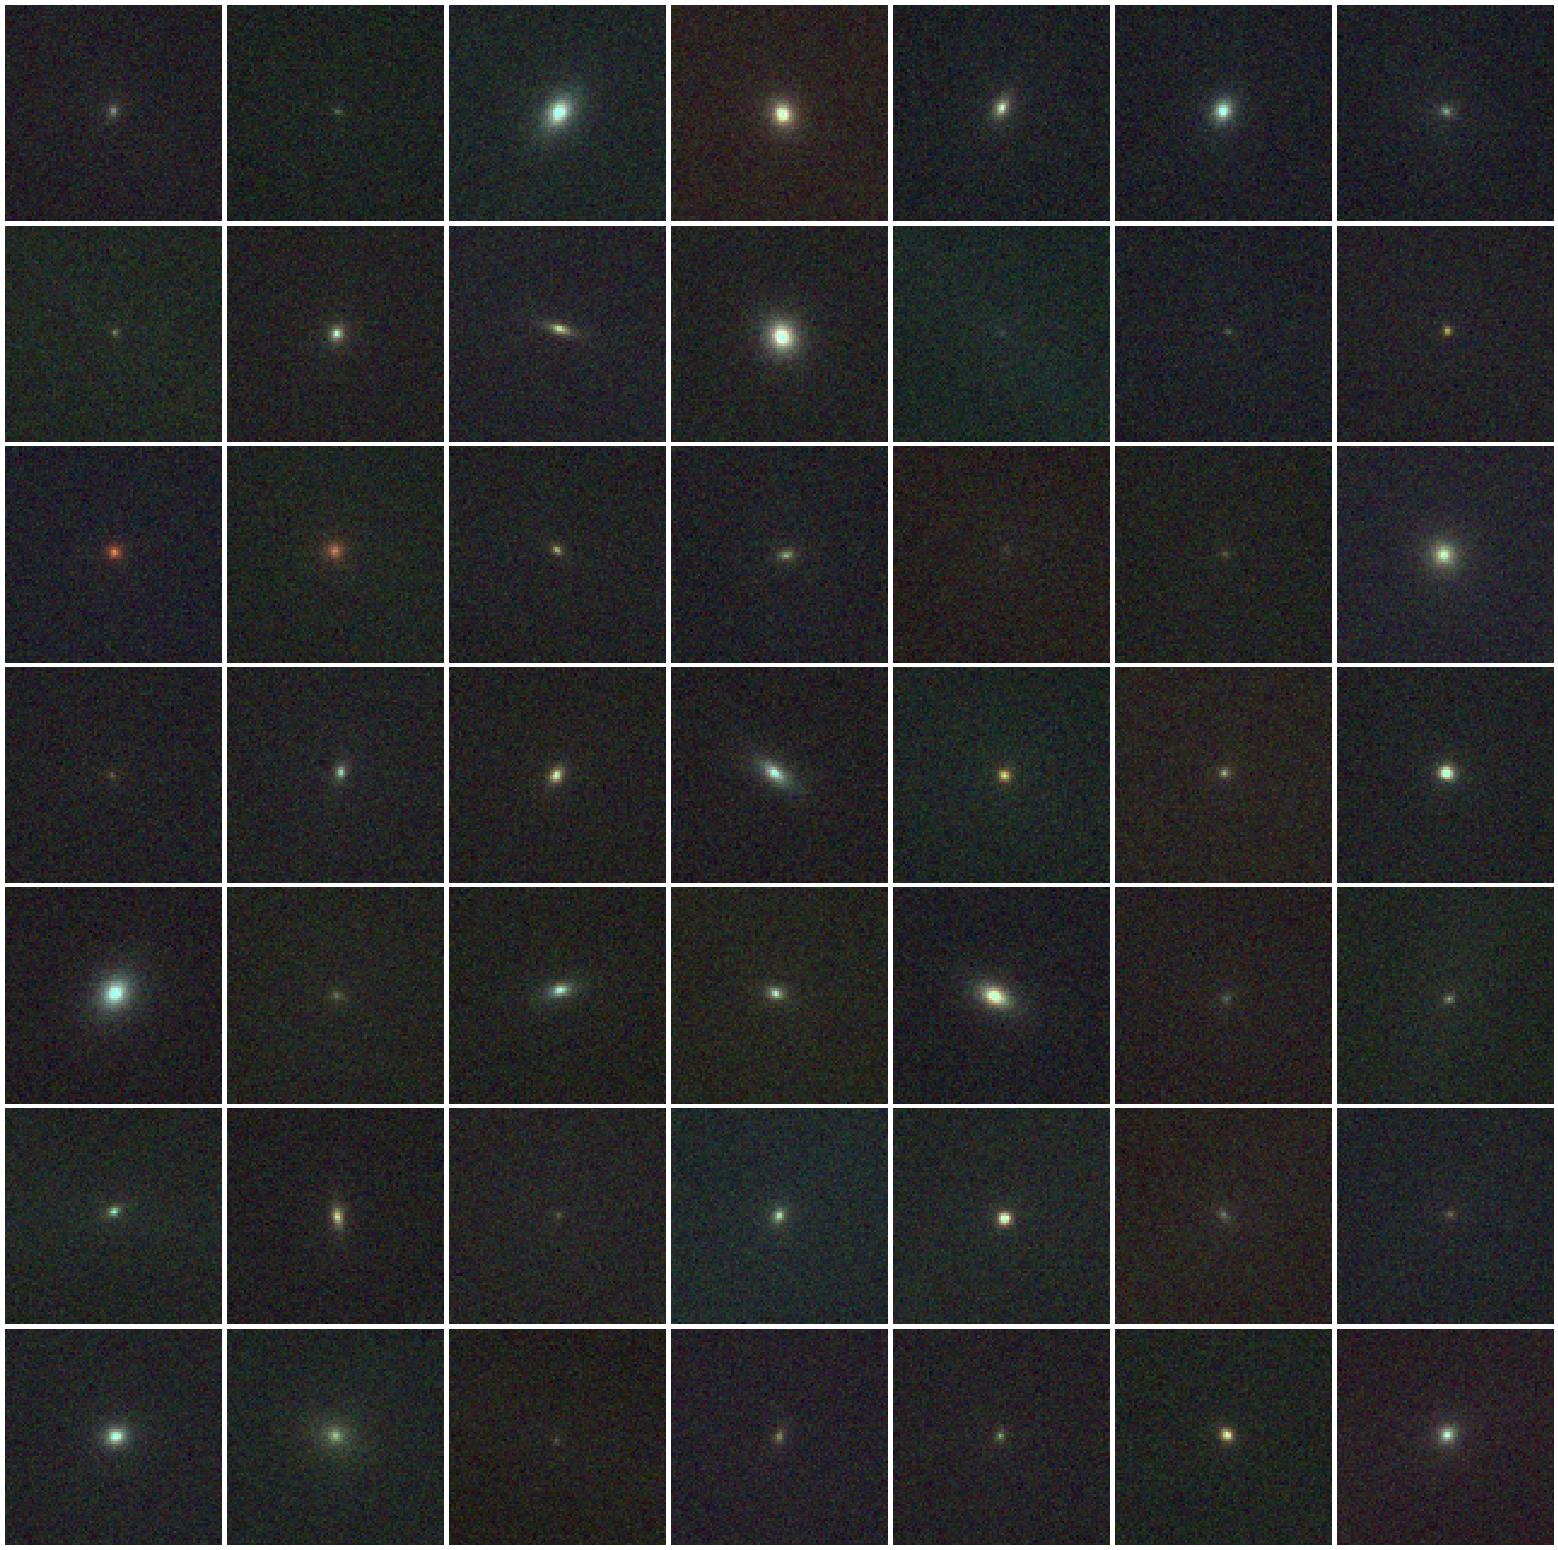

In [5]:
high_z_sources = [l for l in all_lenses if l.z_source > 5]
print(f'Count: {len(high_z_sources)}')

high_z_uids = [l.uid for l in high_z_sources]
high_z_snrs = [l.snr for l in high_z_sources]
pprint(f'{high_z_snrs=}')

high_z_color = [lens_util.get_sample(pipeline_dir, index=uid, model=False)[2] for uid in high_z_uids]

plot.rgb_plot_grid(high_z_color, side=7)

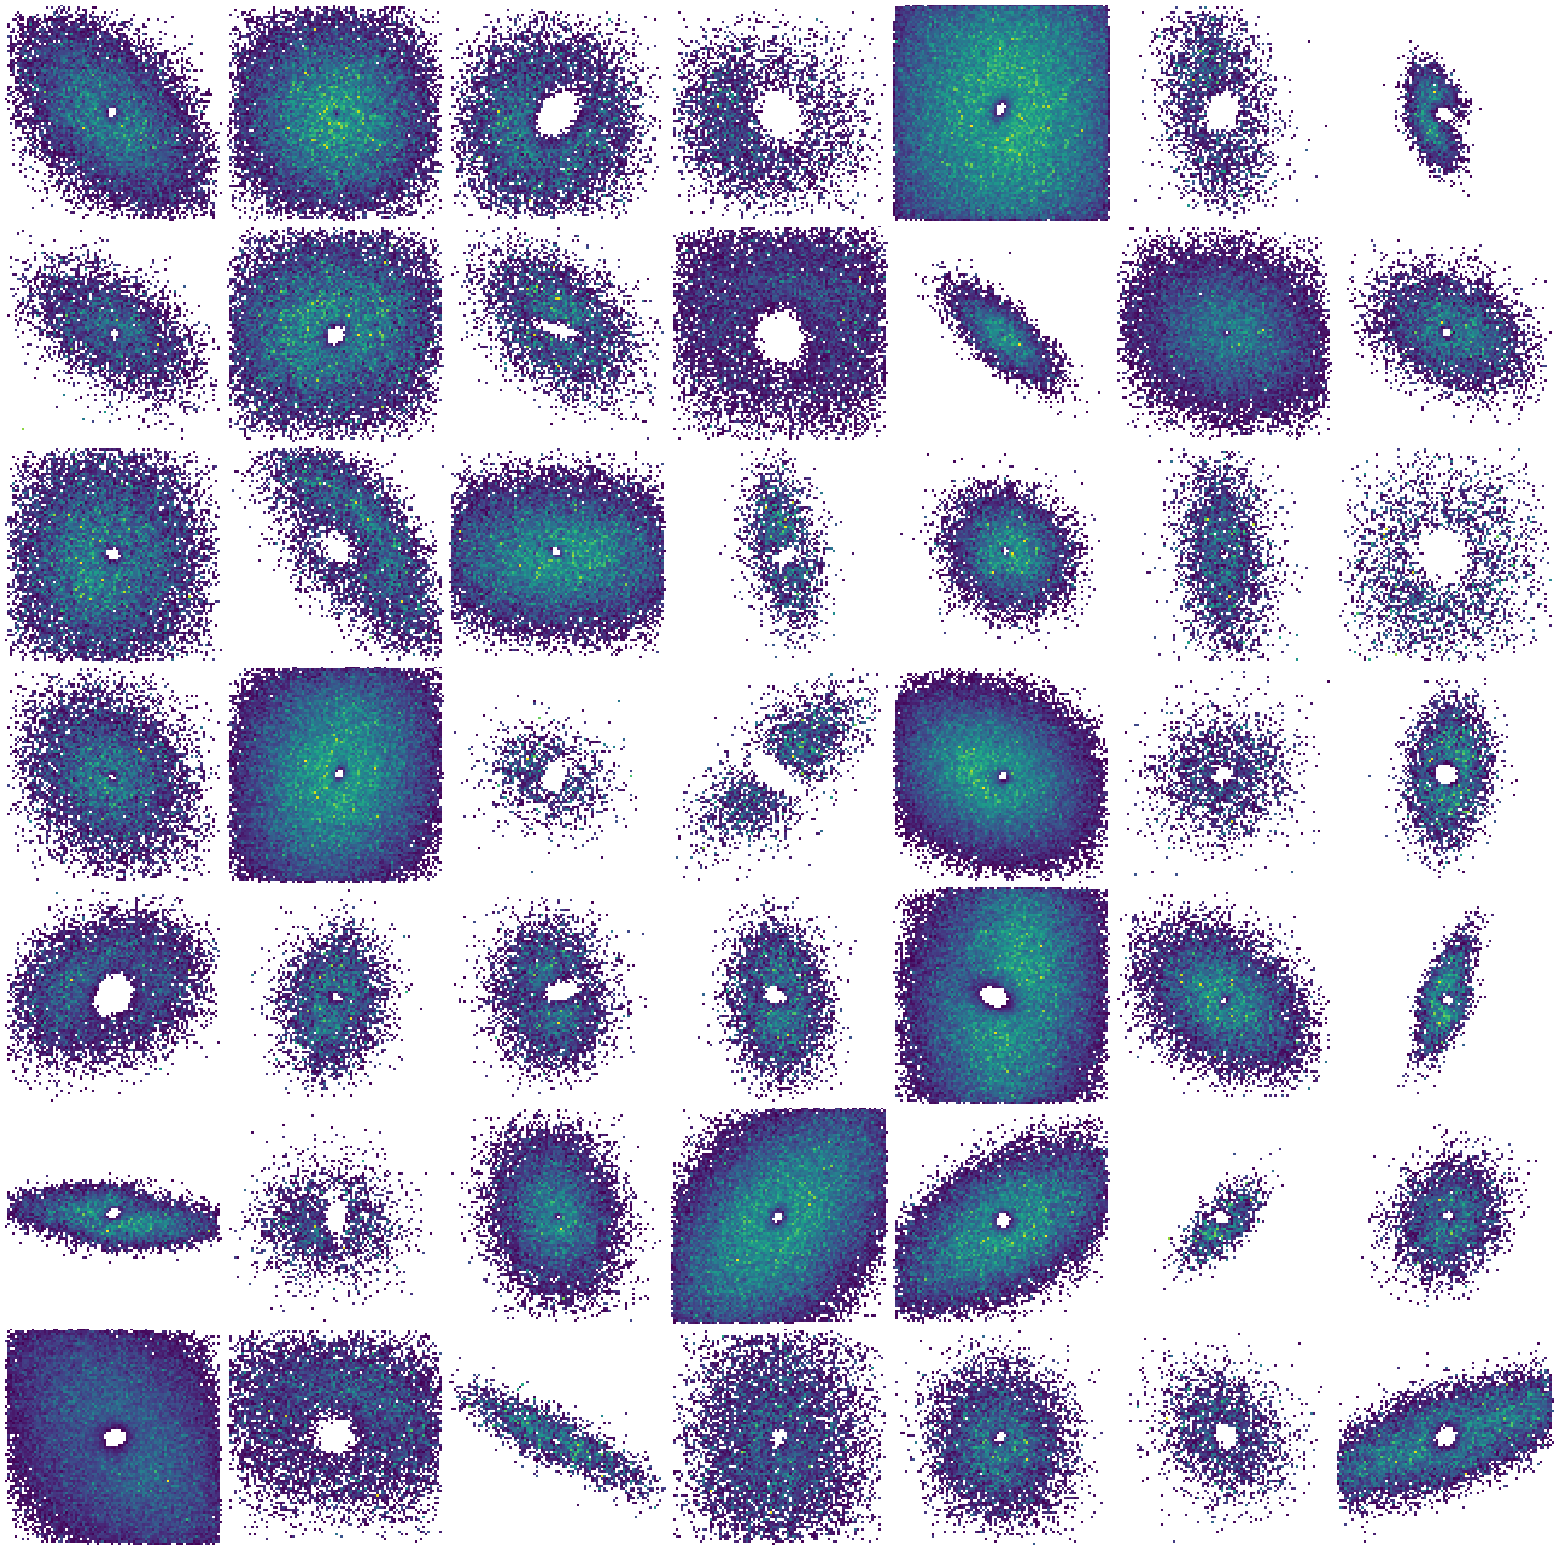

In [6]:
high_z_masked_snr_arrays = [l.masked_snr_array for l in high_z_sources]

plot.rgb_plot_grid(high_z_masked_snr_arrays, side=7)

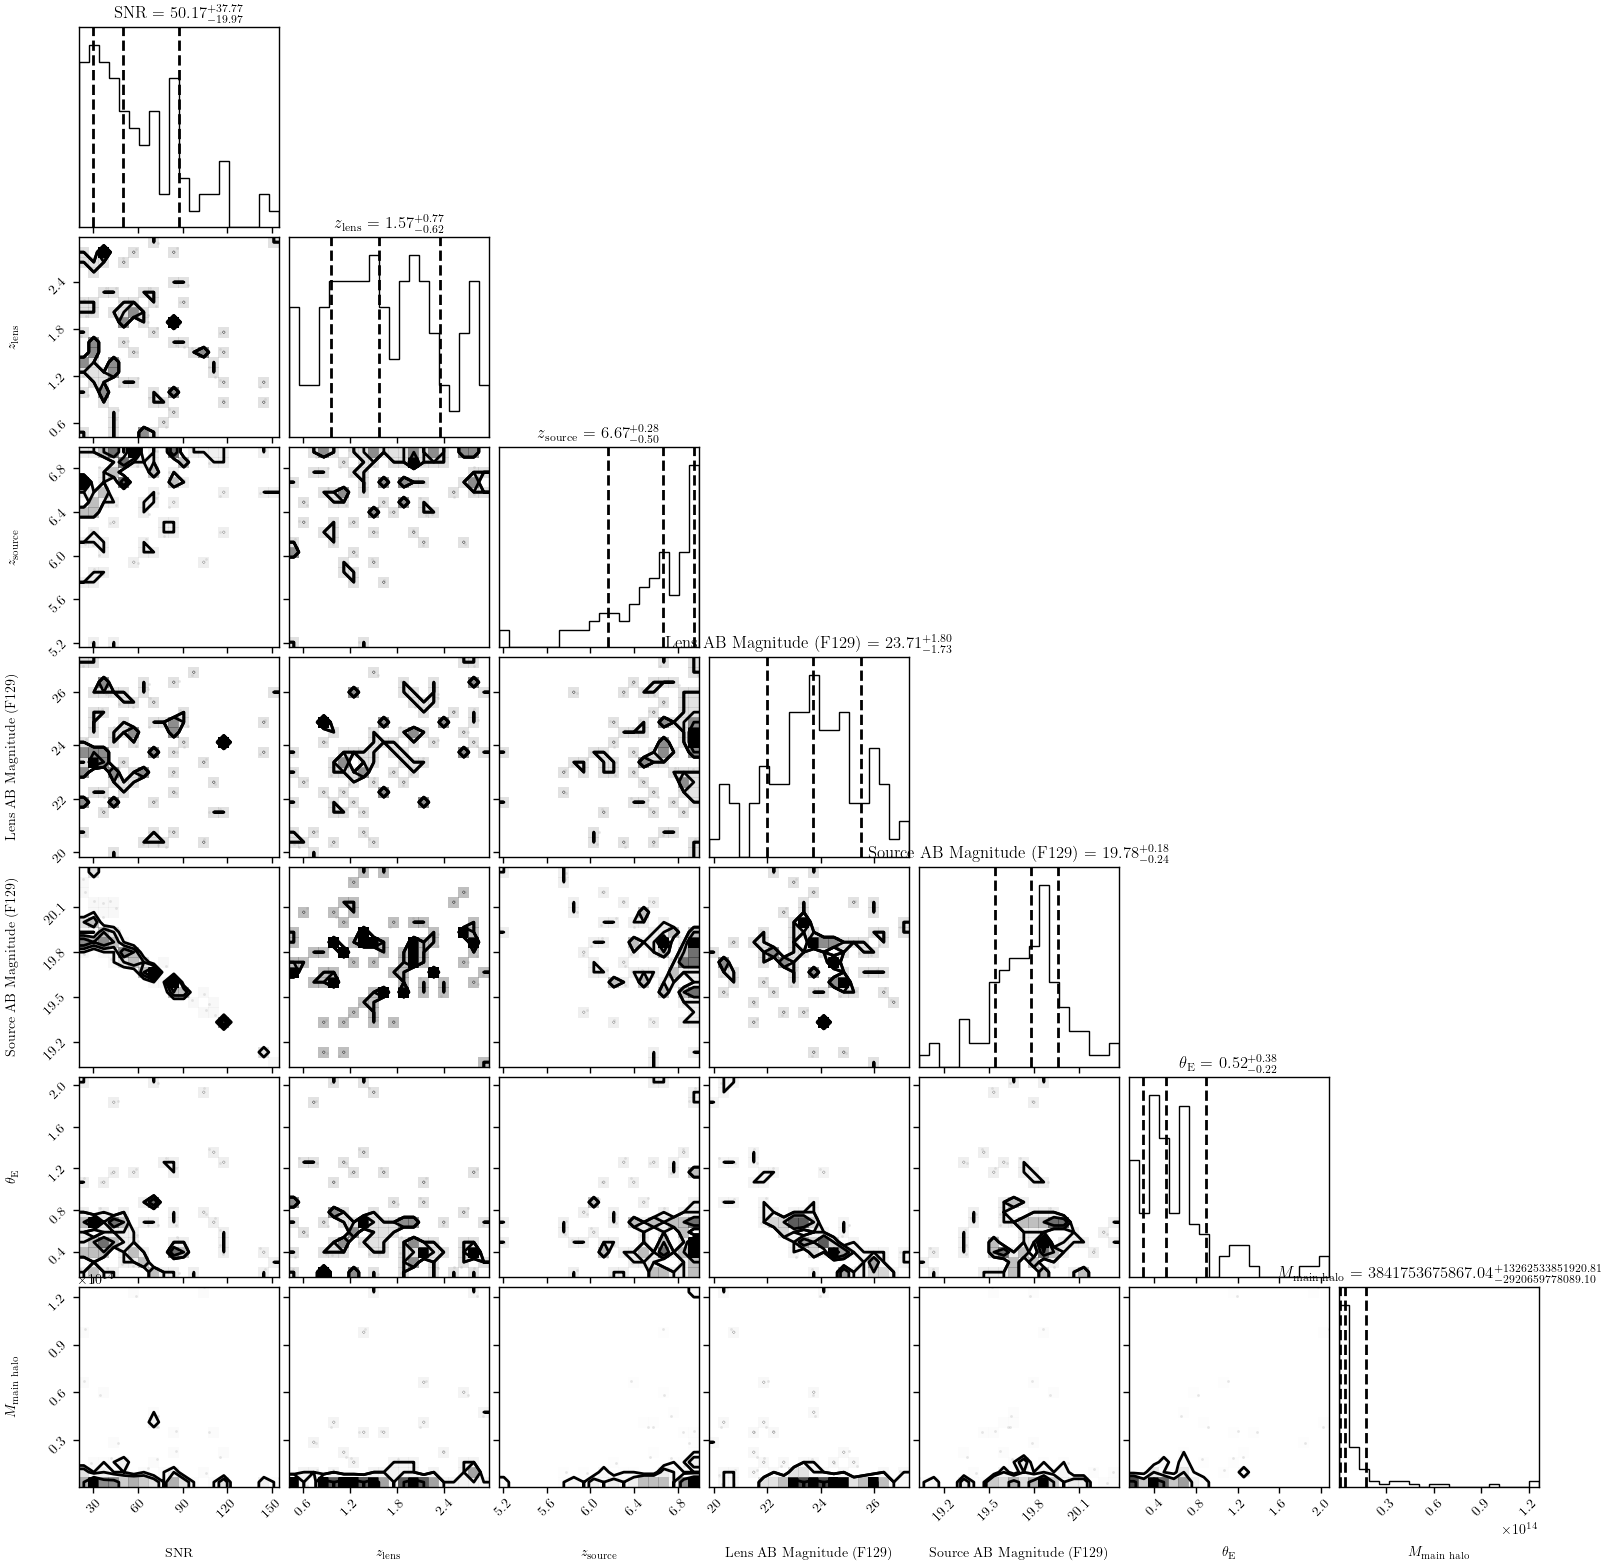

In [7]:
corner.system(high_z_sources, 'F129')